# Transfer learning for Image Classification 
* This Google Co-lab notebook shows you the VGG-16 model in Tensorflow
* then use the pre-trained model VGG-16 as a feature extractor, 
* then builds your neural network

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
tf.__version__

'2.8.2'

## (0) Image Data

### (0.1) The MNIST data

In [3]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


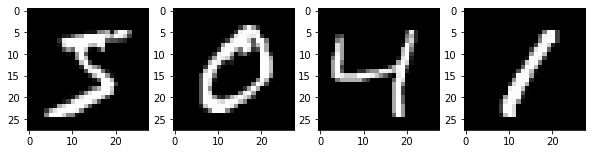

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10,5))
for i in range(4):  
  ax = fig.add_subplot(1, 4, i+1)
  ax.imshow(train_X[i], cmap=plt.get_cmap('gray'))

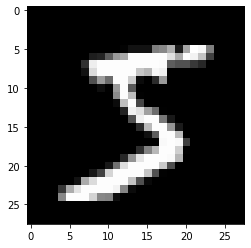

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(train_X[0], cmap=plt.get_cmap('gray'))

In [6]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
import pandas as pd
pd.DataFrame(train_X[0]).to_csv('/content/gdrive/My Drive/data/MNIST_5.csv')

#### (0.2) Color image

(1920, 1080)


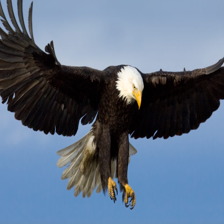

In [8]:
path0 = '/content/gdrive/My Drive/pic/'
filename = path0 + 'eagle.jpeg'
# from "https://cdn.britannica.com/92/152292-050-EAF28A45/Bald-eagle.jpg?raw=true"

# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename).convert('RGB')
print(input_image.size)
input_image = input_image.resize((224,224))
input_image #With google colab, you do not need .show()

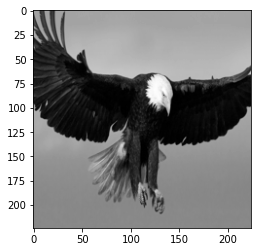

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

# Convert to grayscale for filtering
gray_img = cv2.cvtColor(np.float32(input_image), cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray') 

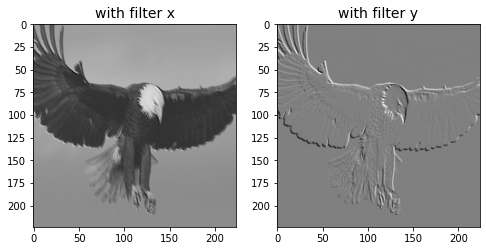

In [10]:
# 2x2 filters
filter_x = np.array([[ 1, -1], 
                   [ 0, 1]])
filter_y = np.array([[0, 1],
                   [-1, 0]])

# filter the image using filter2D(grayscale image, bit-depth, kernel)  
filtered_image1 = cv2.filter2D(gray_img, -1, filter_x)
filtered_image2 = cv2.filter2D(gray_img, -1, filter_y)
f, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].set_title('with filter x', fontsize=14)
ax[0].imshow(filtered_image1, cmap='gray')
ax[1].set_title('with filter y', fontsize=14)
ax[1].imshow(filtered_image2, cmap='gray')

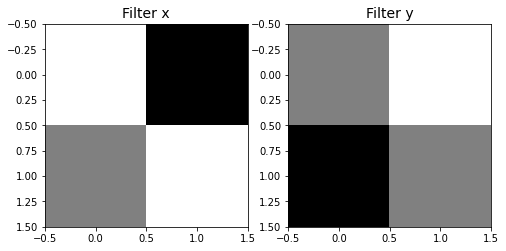

In [11]:
# 2x2 filters
filter_x = np.array([[ 1, -1], 
                   [ 0, 1]])
filter_y = np.array([[0, 1],
                   [-1, 0]])

f, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].set_title('Filter x', fontsize=14)
ax[0].imshow(filter_x, cmap='gray') 
ax[1].set_title('Filter y', fontsize=14)
ax[1].imshow(filter_y, cmap='gray') 

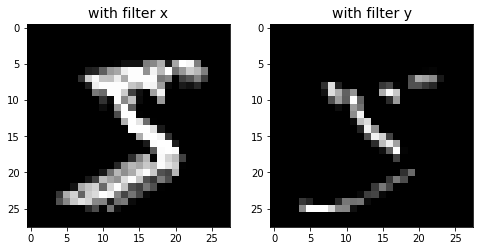

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

# 2x2 filters
filter_x = np.array([[ 1, -1], 
                   [ 0, 1]])
filter_y = np.array([[0, 1],
                   [-1, 0]])

filtered_number_5_x = cv2.filter2D(train_X[0], -1, filter_x)
filtered_number_5_y = cv2.filter2D(train_X[0], -1, filter_y)
f, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].set_title('with filter x', fontsize=14)
ax[0].imshow(filtered_number_5_x, cmap='gray')
ax[1].set_title('with filter y', fontsize=14) 
ax[1].imshow(filtered_number_5_y, cmap='gray') 

## (1) The Pre-Trained Models 

### (1.1) Load VGG-16

In [13]:
# Load pretrained model VGG16
vgg16_model = tf.keras.applications.VGG16(
              weights="imagenet", 
              input_shape=(224, 224, 3),
              include_top = True)
vgg16_model.summary()

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

(1920, 1080)


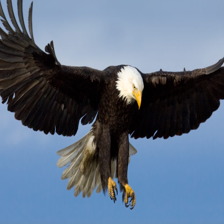

In [14]:
path0 = '/content/gdrive/My Drive/pic/'
filename = path0 + 'eagle.jpeg'

# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename).convert('RGB')
print(input_image.size)
input_image = input_image.resize((224,224))
#input_image.show() 
input_image #With google colab, you do not need .show()

In [15]:
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions

def tf_load_process_image(filename):
  img_size = 224
  # Load image (in PIL image format by default)
  image_original = load_img(filename, target_size=(img_size, img_size))
  print("Image size after loading", image_original.size)

  # Convert from numpy array
  image_array = img_to_array(image_original)
  print("Image size after converting to numpy array", image_array.shape)

  # Expand dims to add batch size as 1
  image_batch = np.expand_dims(image_array, axis=0)
  print("Image size after expanding dimension", image_batch.shape)

  # Preprocess image
  image_preprocessed = tf.keras.applications.vgg16.preprocess_input(image_batch)

  return image_original, image_preprocessed

path0 = '/content/gdrive/My Drive/pic/'
filename = path0 + 'eagle.jpeg'
img_ori, img_preprocessed = tf_load_process_image(filename)

Image size after loading (224, 224)
Image size after converting to numpy array (224, 224, 3)
Image size after expanding dimension (1, 224, 224, 3)


In [16]:
# Get the predictions by the model
predictions = vgg16_model.predict(img_preprocessed)

# Get the prediction class with the highest probrabilities
predicted_class = decode_predictions(predictions, top=5)
predicted_class

49152/35363 [=========================================] - 0s 0us/step


[[('n01614925', 'bald_eagle', 0.9972907),
  ('n01616318', 'vulture', 0.0018751961),
  ('n01608432', 'kite', 0.0007809112),
  ('n02002724', 'black_stork', 1.4233871e-05),
  ('n01795545', 'black_grouse', 8.2380275e-06)]]

### (1.2) Load ResNet

In [17]:
ResNet_model = tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)
ResNet_model.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [18]:
predictions = ResNet_model.predict(img_preprocessed)
# Get the prediction class with the highest probrabilities
predicted_class = decode_predictions(predictions, top=5)
predicted_class

[[('n01614925', 'bald_eagle', 0.9999988),
  ('n01616318', 'vulture', 1.0274559e-06),
  ('n01608432', 'kite', 6.800931e-08),
  ('n01795545', 'black_grouse', 2.4293767e-08),
  ('n01829413', 'hornbill', 2.3868502e-08)]]

### (1.2) Undestand VGG-16


#### (1.2.1) Filters

In [19]:
features = vgg16_model.predict(img_preprocessed)
print(features.shape)
#print (features)

(1, 1000)


In [20]:
vgg16_core = tf.keras.applications.VGG16(
              weights="imagenet", 
              input_shape=(224, 224, 3),
              include_top = False)
features = vgg16_core.predict(img_preprocessed)
print(features.shape)

58900480/58889256 [==============================] - 0s 0us/step
(1, 7, 7, 512)


In [21]:
#from matplotlib import ovolot

# summarize filter shapes
for layer in vgg16_model.layers:
  #check for convolutional layer
  if 'conv' not in layer.name:
    continue
  #get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


#### (1.2.2) Visualize the 64 Filters and Features in Layer 1, block1_conv1, of VGG16 Model

##### (1.2.2.1) The 64 Filters

In [22]:
filters[:, :, :, 1]

array([[[ 0.00482621,  0.0026059 , -0.00643837, ...,  0.01203183,
          0.00608531,  0.00351887],
        [ 0.00264736,  0.00501031, -0.00472286, ...,  0.00553716,
         -0.00075161,  0.01369943],
        [-0.00078511, -0.00406337, -0.00119903, ...,  0.00896073,
         -0.00481695,  0.01017584]],

       [[ 0.00553842, -0.00467704, -0.00331198, ...,  0.0057952 ,
          0.00604208,  0.00277068],
        [ 0.01196932, -0.00561146,  0.00099588, ...,  0.00195525,
          0.00161081,  0.00270054],
        [ 0.00613113, -0.00871018,  0.00346401, ...,  0.00164373,
         -0.00535336,  0.00430264]],

       [[ 0.00462881, -0.00604889,  0.0002703 , ..., -0.00329879,
          0.00513885,  0.0088736 ],
        [ 0.01403889, -0.00333703,  0.00092424, ..., -0.00242003,
          0.0019437 ,  0.01537882],
        [ 0.00911168, -0.00204551,  0.00432094, ..., -0.0013978 ,
         -0.0046391 ,  0.01571317]]], dtype=float32)

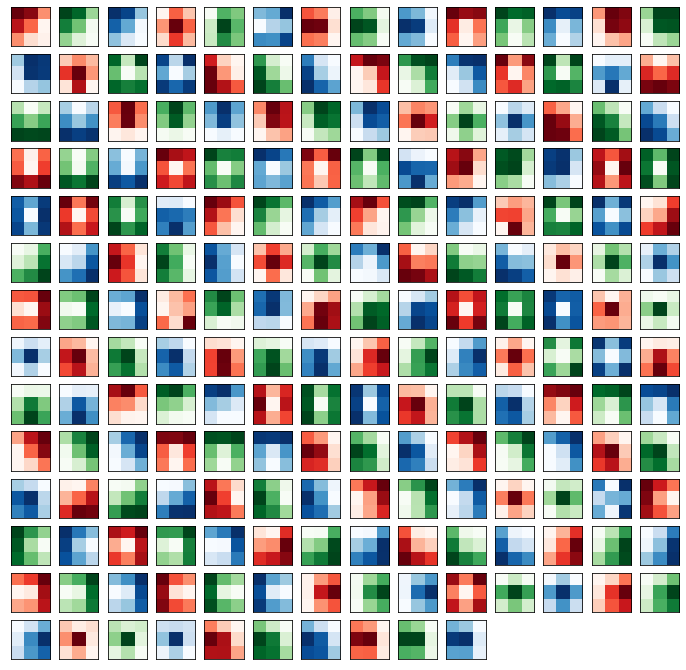

In [23]:
# retrieve weights from block1_conv1
filters, biases = vgg16_model.layers[1].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

plt.figure(figsize=(12,12))
n_filters, ix = 64, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(14, 14, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        if j == 0:
            plt.imshow(f[:, :, j], cmap='Reds')
        elif j == 1:
            plt.imshow(f[:, :, j], cmap='Greens')
        elif j == 2:
            plt.imshow(f[:, :, j], cmap='Blues')
        ix += 1
        
# show the figure
plt.show()

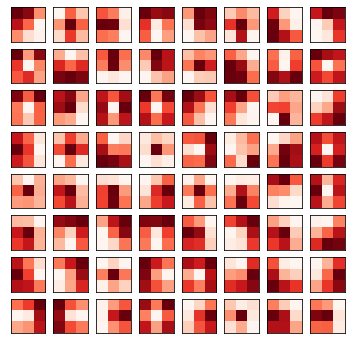

In [24]:
# plot the filters by channel. These are the filters for the "R" channel of "RGB"
plt.figure(figsize=(6,6))
n_filters, ix = 64, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    j = 0
    ax = plt.subplot(8, 8, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, j], cmap='Reds')
    ix += 1
plt.show()

Visualizing the feature maps of the First Convolutional Layer in the VGG16 Model

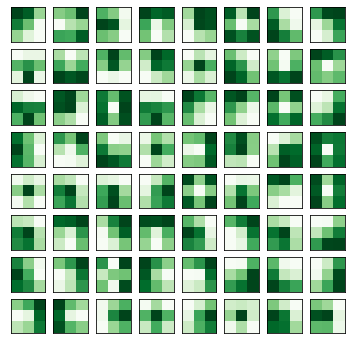

In [25]:
# plot the filters by channel. These are the filters for the "G" channel of "RGB"
plt.figure(figsize=(6,6))
n_filters, ix = 64, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    # specify subplot and turn of axis
    j = 2
    ax = plt.subplot(8, 8, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, j], cmap='Greens')
    ix += 1
        
# show the figure
plt.show()

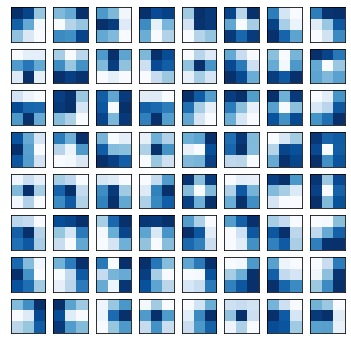

In [26]:
# plot the filters by channel. These are the filters for the "B" channel of "RGB"
plt.figure(figsize=(6,6))
n_filters, ix = 64, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    # specify subplot and turn of axis
    j = 2
    ax = plt.subplot(8, 8, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, j], cmap='Blues')
    ix += 1
        
# show the figure
plt.show()

In [27]:
# Get the output right after the 1st hidden layer
model = tf.keras.Model(inputs=[vgg16_model.input], outputs=vgg16_model.layers[1].output)
model.summary()

# get feature map for first hidden layer
feature_maps = model.predict(img_preprocessed)
feature_maps.shape

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


(1, 224, 224, 64)

##### (1.2.2.2) The 64 Features

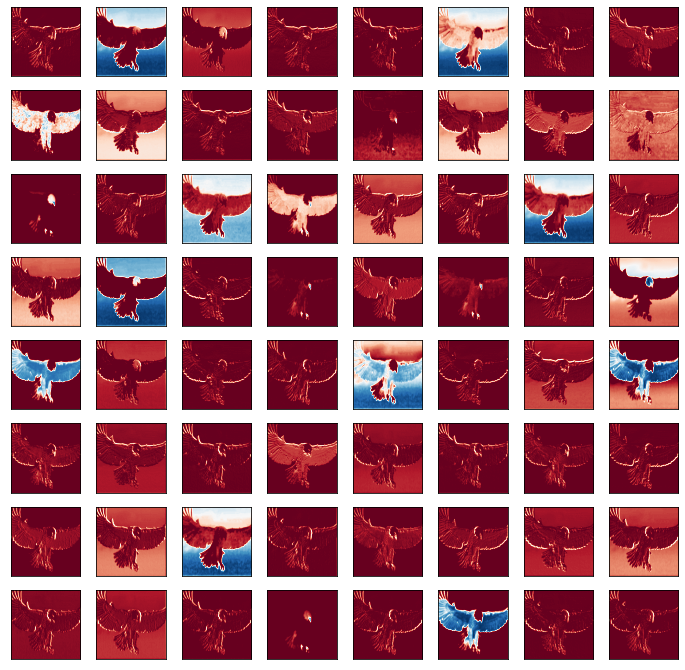

In [28]:
plt.figure(figsize=(12,12))
# plot the 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='RdBu') # 'RdBu','PRGn' 'CMRmap' 'gnuplot2'
        ix += 1
        
# show the figure
plt.show()

#### (1.2.3) Visualize the 512 Filters in block5_conv3, of VGG16 Model

##### (1.2.3.1) Filters

In [29]:
# retrieve weights from block5_conv3
filters, biases = vgg16_model.layers[17].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
filters.shape

(3, 3, 512, 512)

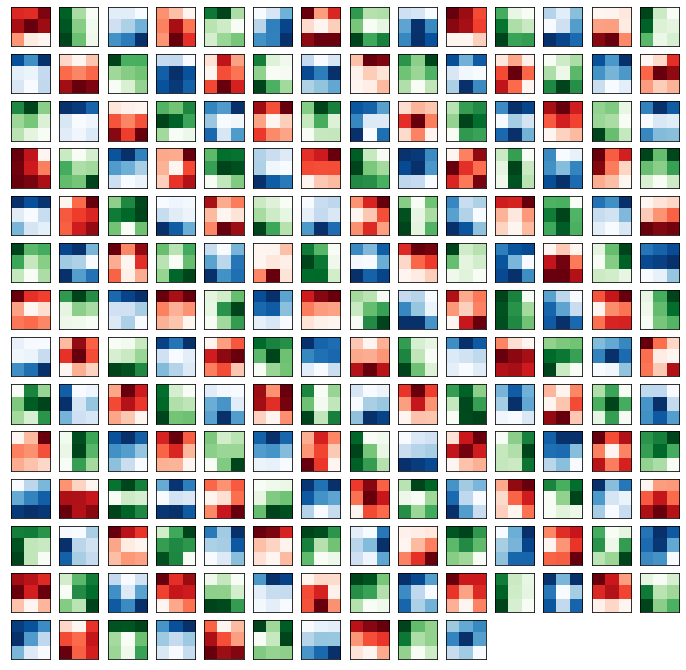

In [30]:
# Display 64 of 512 filters
filters, biases = vgg16_model.layers[17].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

plt.figure(figsize=(12,12))
n_filters, ix = 64, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(14, 14, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        if j == 0:
            plt.imshow(f[:, :, j], cmap='Reds')
        elif j == 1:
            plt.imshow(f[:, :, j], cmap='Greens')
        elif j == 2:
            plt.imshow(f[:, :, j], cmap='Blues')
        ix += 1
        
# show the figure
plt.show()

##### (1.2.3.2) Features

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

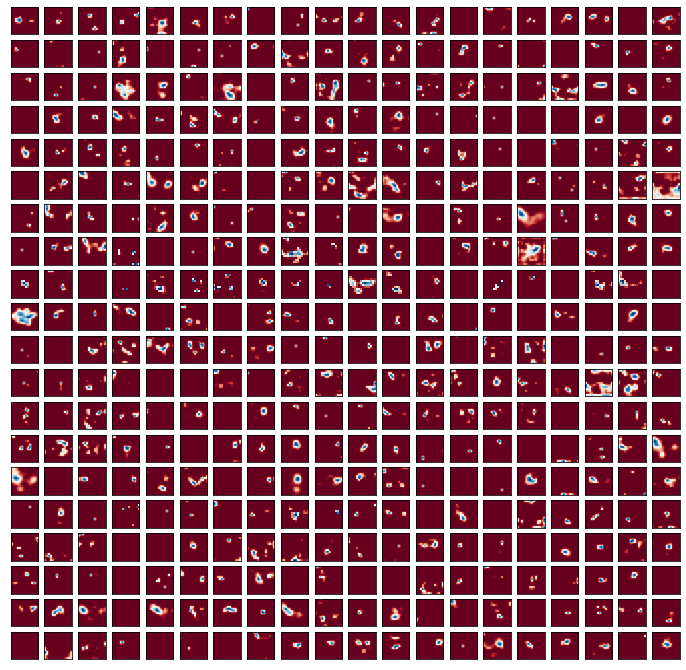

In [31]:
# Get the output right after the 17th hidden layer
model = tf.keras.Model(inputs=[vgg16_model.input], outputs=vgg16_model.layers[17].output)
model.summary()

# get the feature map
feature_maps = model.predict(img_preprocessed)
feature_maps.shape

plt.figure(figsize=(12,12))
# plot the 64 maps in an 8x8 squares
square = 20
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='RdBu') # 'RdBu','PRGn' 'CMRmap' 'gnuplot2'
        ix += 1
        
# show the figure
plt.show()

#### (1.2.4) The flatten layer 

In [32]:
# Display 64 of 512 features
# Get the output right after the 19th hidden layer
model = tf.keras.Model(inputs=[vgg16_model.input], outputs=vgg16_model.layers[19].output)
model.summary()
# get the feature map
feature_maps = model.predict(img_preprocessed)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [33]:
feature_maps

array([[0.       , 0.       , 0.       , ..., 0.       , 0.4846568,
        0.       ]], dtype=float32)

### (2) Search and download images programmatically
See [this tensorflow page](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory)


In [ ]:
import urllib
#url, filename = ("https://github.com/dataman-git/codes_for_articles/blob/master/pic/tesla.png?raw=true", "tesla.jpg")
url, filename = ("https://cff2.earth.com/uploads/2022/01/06080341/Goldfish.jpg?raw=true", "goldfish.jpg")
url, filename = ("https://cdn.britannica.com/92/152292-050-EAF28A45/Bald-eagle.jpg?raw=true", "eagle.jpg")

try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename).convert('RGB')
print(input_image.size)
input_image.show()

#pix = np.array(im.getdata()).reshape(im.size[0], im.size[1], 3)
#pix[1:10]

(1600, 1071)


In [ ]:
# Structure your images according to this folder structure:
# https://www.tensorflow.org/datasets/api_docs/python/tfds/folder_dataset/ImageFolder

var = 'car front bumper damage'
#var = 'car rear bumper damage'
#var = 'car side damage'
var_folder = var.replace(" ", "_")
train_path = '/content/gdrive/My Drive/images/train/' + var_folder
test_path = '/content/gdrive/My Drive/images/test/' + var_folder

##################################################
# Method 1
# import distutils.dir_util
# distutils.dir_util.mkpath(path)

# Method 2
# import os
# try:
#     os.makedirs(path)
# except FileExistsError:
#      print("File already exists")
#
# Method 3
# import os
# os.makedirs(path)
        
# Method 4
# from pathlib import Path
# Path(path).mkdir(parents=True, exist_ok=True)
##################################################

# Method 2
import os
try:
    os.makedirs(train_path)
    os.makedirs(test_path)
except FileExistsError:
     print("File already exists")

#!pip install  icrawler
from icrawler.builtin import GoogleImageCrawler
google_Crawler = GoogleImageCrawler(storage = {'root_dir': train_path})
google_Crawler.crawl(keyword = var , max_num = 1000)
google_Crawler = GoogleImageCrawler(storage = {'root_dir': test_path})
google_Crawler.crawl(keyword = var , max_num = 500)

ERROR:downloader:Response status code 403, file https://preview.redd.it/lokee61hha7z.jpg
ERROR:downloader:Response status code 403, file https://cfx-wp-images.imgix.net/2020/04/Car-With-Structural-Damage.jpg
ERROR:downloader:Response status code 403, file https://preview.redd.it/6mc2b6xmhpyy.jpg
ERROR:downloader:Response status code 400, file https://www.liveabout.com/thmb/IP3GEX9frHOozzsxjMhaybyTQlE\u003d/3851x2888/smart/filters:no_upscale()/close-up-of-a-damaged-car-from-a-crash-155136025-59c1c35daad52b00111f18c3.jpg
ERROR:downloader:Response status code 403, file https://preview.redd.it/lokee61hha7z.jpg
ERROR:downloader:Response status code 403, file https://cfx-wp-images.imgix.net/2020/04/Car-With-Structural-Damage.jpg
ERROR:downloader:Response status code 403, file https://preview.redd.it/6mc2b6xmhpyy.jpg
ERROR:downloader:Response status code 400, file https://www.liveabout.com/thmb/IP3GEX9frHOozzsxjMhaybyTQlE\u003d/3851x2888/smart/filters:no_upscale()/close-up-of-a-damaged-car-fr

In [ ]:
# Structure your images according to this folder structure:
# https://www.tensorflow.org/datasets/api_docs/python/tfds/folder_dataset/ImageFolder

#var = 'car front bumper damage'
#var = 'car rear bumper damage'
var = 'car side damage'
var_folder = var.replace(" ", "_")
path = '/content/gdrive/My Drive/images2/' + var_folder

# Method 2
import os
try:
    os.makedirs(path)
except FileExistsError:
     print("File already exists")

#!pip install  icrawler
from icrawler.builtin import GoogleImageCrawler
google_Crawler = GoogleImageCrawler(storage = {'root_dir': path})
google_Crawler.crawl(keyword = var , max_num = 500)

ERROR:downloader:Exception caught when downloading file https://p.kindpng.com/picc/s/5-57385_repairing-accident-car-damaged-car-side-view-hd.png, error: HTTPSConnectionPool(host='p.kindpng.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://p.kindpng.com/picc/s/5-57385_repairing-accident-car-damaged-car-side-view-hd.png, error: HTTPSConnectionPool(host='p.kindpng.com', port=443): Max retries exceeded with url: /picc/s/5-57385_repairing-accident-car-damaged-car-side-view-hd.png (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f023ac75850>, 'Connection to p.kindpng.com timed out. (connect timeout=5)')), remaining retry times: 1
ERROR:downloader:Response status code 403, file https://www.theglobeandmail.com/resizer/23lVBHoObCBDLHE0Ud5fg3mk8tc\u003d/arc-anglerfish-tgam-prod-tgam/public/OXWRR7PRVZB6TAVF6J6PJ6PA4Q.jpg
ERROR:downloader:Response status code 403, file h

In [ ]:
import os
num_skipped = 0
for folder_name in ('car_front_bumper_damage','car_rear_bumper_damage','car_side_damage'):
    folder_path = os.path.join('/content/gdrive/My Drive/images2/', folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


#### (3) Load the image data with TF

In [34]:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
image_size = (224, 224)
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/gdrive/My Drive/images',
    #labels='inferred',
    #label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/gdrive/My Drive/images',
    #labels='inferred',
    #label_mode='categorical',
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

#class names and sampling a few images
train_classes = train_ds.class_names
test_classes = test_ds.class_names
print(train_classes)

Found 594 files belonging to 3 classes.
Using 476 files for training.
Found 594 files belonging to 3 classes.
Using 118 files for validation.
['car_front_bumper_damage', 'car_rear_bumper_damage', 'car_side_damage']


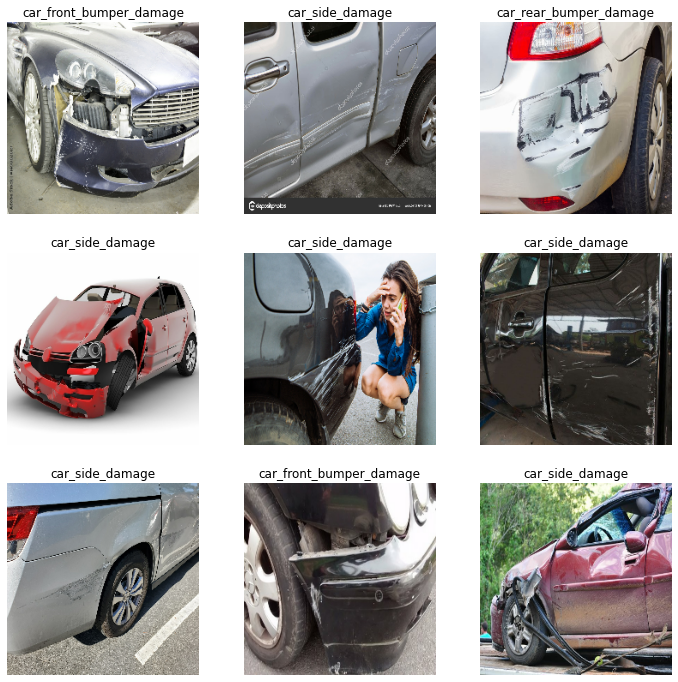

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_classes[labels[i]])
        plt.axis("off")

In [36]:
# Just to show you the image data array
import matplotlib.pyplot as plt
for images, labels in train_ds.take(1):
    for i in range(1): # To display the 9 images to 3 by 3
        print("The classes are: ", train_classes)
        print("The label for this image is: ", labels[i])
        print("So it is: ",train_classes[labels[i]])
        print("The image data:")
        print(images[i].numpy().astype("uint8"))
        

The classes are:  ['car_front_bumper_damage', 'car_rear_bumper_damage', 'car_side_damage']
The label for this image is:  tf.Tensor(1, shape=(), dtype=int32)
So it is:  car_rear_bumper_damage
The image data:
[[[155 168 194]
  [155 170 196]
  [155 171 197]
  ...
  [ 54  66  82]
  [ 55  64  81]
  [ 91  98 114]]

 [[153 169 195]
  [152 168 194]
  [154 170 196]
  ...
  [ 55  67  82]
  [ 56  65  82]
  [ 95 101 117]]

 [[154 169 197]
  [153 169 195]
  [155 171 197]
  ...
  [ 54  66  81]
  [ 88  97 112]
  [ 97 106 121]]

 ...

 [[ 80  78  85]
  [ 85  84  91]
  [105 105 116]
  ...
  [ 31  25  25]
  [ 35  32  33]
  [110 110 114]]

 [[105 103 109]
  [101 100 110]
  [105 103 114]
  ...
  [ 27  23  22]
  [ 30  28  29]
  [119 120 124]]

 [[101  99 106]
  [105 103 114]
  [108 107 120]
  ...
  [131 133 134]
  [137 139 140]
  [171 179 181]]]


### (4) Use VGG-16 to Predict the Car Damage Image

In [37]:
# Get the predictions by the model
predictions = vgg16_model.predict(train_ds.take(1))

# Get the prediction class with the highest probrabilities
# The unique identifier of 'bald_eagle' in ImageNet is 'n01614925'
# The unique identifier of 'vulture' in ImageNet is 'n01616318'
predicted_class = decode_predictions(predictions, top=5)
predicted_class

[[('n04517823', 'vacuum', 0.25009203),
  ('n03891332', 'parking_meter', 0.24298795),
  ('n04254120', 'soap_dispenser', 0.094288334),
  ('n03584829', 'iron', 0.072756566),
  ('n04557648', 'water_bottle', 0.057562046)],
 [('n03271574', 'electric_fan', 0.5277262),
  ('n04465501', 'tractor', 0.11007158),
  ('n03478589', 'half_track', 0.100048654),
  ('n03594945', 'jeep', 0.05138059),
  ('n03967562', 'plow', 0.04643669)],
 [('n03100240', 'convertible', 0.4979403),
  ('n04285008', 'sports_car', 0.18064378),
  ('n02814533', 'beach_wagon', 0.12079933),
  ('n02974003', 'car_wheel', 0.0805322),
  ('n03930630', 'pickup', 0.033374432)],
 [('n03584829', 'iron', 0.4118448),
  ('n02917067', 'bullet_train', 0.13092601),
  ('n03127747', 'crash_helmet', 0.094869845),
  ('n04285008', 'sports_car', 0.07517889),
  ('n02974003', 'car_wheel', 0.045949403)],
 [('n04133789', 'sandal', 0.47212914),
  ('n03788365', 'mosquito_net', 0.24881831),
  ('n04120489', 'running_shoe', 0.0763073),
  ('n02804414', 'bassinet

### (5) Transfer Learning Model Setup

#### (5.1) Model Setup
* We will set "include_top=False" to remove the last three full-connected layers.

In [38]:
img_size = 224
img_shape = (img_size, img_size, 3)
VGG16_features=tf.keras.applications.VGG16(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')
VGG16_features.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
VGG16_features.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
fc1 = tf.keras.layers.Dense(64, activation='relu')
prediction_layer = tf.keras.layers.Dense(len(np.unique(labels)),activation='softmax') 

* global_average_layer: click [here](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/blocks/global-average-pooling-2d)
* The 2D Global average pooling block takes a tensor of size (input width) x (input height) x (input channels) and computes the average value of all values across the entire (input width) x (input height) matrix for each of the (input channels).

In [40]:
model = tf.keras.Sequential([
  VGG16_features,
  global_average_layer,
  fc1,
  prediction_layer
])

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy, # Calculates how often predictions match integer labels. We’re predicting classes, so we use categorical crossentropy as our loss function. We will measure the performance of the model using accuracy
              metrics=["accuracy"])

In [42]:
VGG16_features.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 14,747,715
Trainable params: 33,027
Non-trainable params: 14,714,688
_________________________________________________________________


In [44]:
steps_per_epoch = len(train_ds)
print(steps_per_epoch) #  = 15

validation_steps =len(test_ds)
print(validation_steps) # = 4

15
4


In [ ]:
# This step will take a long time
NUM_EPOCHS = 15
history = model.fit(train_ds,
                    epochs=NUM_EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    validation_data=test_ds)

Epoch 1/15
15/15 [==============================] - 315s 21s/step - loss: 3.5514 - accuracy: 0.4727 - val_loss: 1.6410 - val_accuracy: 0.6271
Epoch 2/15
15/15 [==============================] - 303s 20s/step - loss: 1.0067 - accuracy: 0.7311 - val_loss: 0.6655 - val_accuracy: 0.8136
Epoch 3/15
15/15 [==============================] - 302s 20s/step - loss: 0.3556 - accuracy: 0.8824 - val_loss: 0.3708 - val_accuracy: 0.8559
Epoch 4/15
15/15 [==============================] - 302s 20s/step - loss: 0.1435 - accuracy: 0.9580 - val_loss: 0.1307 - val_accuracy: 0.9322
Epoch 5/15
15/15 [==============================] - 301s 20s/step - loss: 0.0808 - accuracy: 0.9811 - val_loss: 0.0679 - val_accuracy: 0.9831
Epoch 6/15
15/15 [==============================] - 307s 21s/step - loss: 0.0468 - accuracy: 0.9895 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 7/15
15/15 [==============================] - 306s 20s/step - loss: 0.0429 - accuracy: 0.9895 - val_loss: 0.0562 - val_accuracy: 0.9831
Epoch 

In [ ]:
model.save('/content/gdrive/My Drive/data/transfer_learning_model')

In [47]:
loss0,accuracy0 = model.evaluate(test_ds, steps = validation_steps)

print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy0))

4/4 [==============================] - 61s 14s/step - loss: 0.0424 - accuracy: 0.9915
loss: 0.04
accuracy: 0.99


In [48]:
history.history['accuracy']

[0.47268906235694885,
 0.7310924530029297,
 0.8823529481887817,
 0.9579831957817078,
 0.9810924530029297,
 0.9894958138465881,
 0.9894958138465881,
 0.9915966391563416,
 0.9894958138465881,
 0.9852941036224365,
 0.9852941036224365,
 0.9957982897758484,
 0.9873949289321899,
 0.9873949289321899,
 0.9915966391563416]

In [49]:
history.history['val_accuracy']

[0.6271186470985413,
 0.8135592937469482,
 0.8559321761131287,
 0.9322034120559692,
 0.9830508232116699,
 1.0,
 0.9830508232116699,
 0.9830508232116699,
 0.9745762944221497,
 0.991525411605835,
 0.991525411605835,
 0.9745762944221497,
 0.9830508232116699,
 0.9745762944221497,
 0.991525411605835]

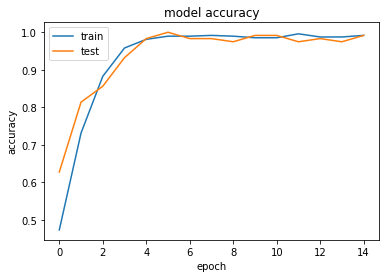

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
history.history['loss']

[3.551403760910034,
 1.0067089796066284,
 0.35560092329978943,
 0.1434815526008606,
 0.08080048114061356,
 0.0467977412045002,
 0.042936865240335464,
 0.03470032289624214,
 0.027637353166937828,
 0.04450807347893715,
 0.04175034910440445,
 0.026430943980813026,
 0.03212830051779747,
 0.019598230719566345,
 0.018952682614326477]

In [52]:
history.history['val_loss']

[1.6409664154052734,
 0.6654836535453796,
 0.3708489239215851,
 0.13071690499782562,
 0.06793927401304245,
 0.05121858790516853,
 0.056211646646261215,
 0.046426258981227875,
 0.04726263880729675,
 0.038197726011276245,
 0.05378666892647743,
 0.0522722564637661,
 0.04475861042737961,
 0.04663202166557312,
 0.04235442727804184]

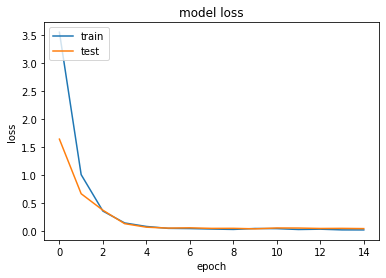

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
# Get the predictions by the model
model_car = tf.keras.models.load_model('/content/gdrive/My Drive/data/transfer_learning_model')
car_predictions = np.round(model_car.predict(train_ds.take(1)),2)
car_classes = train_ds.class_names
# Get the prediction class with the highest probrabilities
print(car_classes)
print(car_predictions)
# Notice we do not use "decode_predictions(car_predictions, top=5)" because decode_predictions is only for ImageNet

['car_front_bumper_damage', 'car_rear_bumper_damage', 'car_side_damage']
[[0.   0.   1.  ]
 [0.01 0.99 0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.99 0.   0.01]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.99 0.   0.01]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.01 0.99]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.97 0.   0.03]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.99 0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.01 0.99 0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.01 0.98 0.01]
 [0.99 0.   0.01]
 [0.   0.   1.  ]
 [1.   0.   0.  ]]


In [ ]:
predicted_class = np.argmax(car_predictions[0])
car_classes[predicted_class]

In [ ]:
actual_pred = pd.DataFrame()
# Get the actuals & predictions
actual = []
pred = []
for i in range(32):
  # actuals
  y =train_classes[labels[i]]
  actual.append(y)

  # predictions
  predicted_class = np.argmax(car_predictions[i]) # Get the location of the maximum value. 
  pred.append(car_classes[predicted_class])

actual_pred['actual'] = actual
actual_pred['pred'] = pred
actual_pred

In [ ]:
pd.crosstab(actual_pred['actual'],actual_pred['pred'])

### (5) Transfer Learning Fine-Tuning

* Open up more layers of VGG-16

In [43]:
vgg16_trainable = tf.keras.applications.VGG16(
              weights="imagenet", 
              input_shape=(224, 224, 3),
              include_top = False)

for layer in vgg16_trainable.layers:
    print(layer.name)

input_5
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [44]:
for layer in vgg16_trainable.layers:
    if layer.name in ['block5_conv3']: #,'block5_conv2','block5_conv1']:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in vgg16_trainable.layers:
    print(layer.name, layer.trainable)

input_5 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 True
block5_pool False


In [45]:
import numpy as np
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(len(np.unique(labels)),activation='softmax') 
fc1 = tf.keras.layers.Dense(64, activation='relu')
ft_model = tf.keras.Sequential([
  vgg16_trainable,
  global_average_layer,
  fc1,
  prediction_layer
])

ft_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy, # Calculates how often predictions match integer labels. We’re predicting classes, so we use categorical crossentropy as our loss function. We will measure the performance of the model using accuracy
              metrics=["accuracy"])

In [46]:
steps_per_epoch = len(train_ds)
print(steps_per_epoch) #  = 15

validation_steps =len(test_ds)
print(validation_steps) # = 4

NUM_EPOCHS = 15
ft_history = ft_model.fit(train_ds,
                    epochs=NUM_EPOCHS, 
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps,
                    validation_data=test_ds)

15
4
Epoch 1/15
15/15 [==============================] - 356s 24s/step - loss: 26.4330 - accuracy: 0.3971 - val_loss: 4.4915 - val_accuracy: 0.4746
Epoch 2/15
15/15 [==============================] - 315s 21s/step - loss: 2.0708 - accuracy: 0.6471 - val_loss: 0.8466 - val_accuracy: 0.7627
Epoch 3/15
15/15 [==============================] - 317s 21s/step - loss: 0.4747 - accuracy: 0.8466 - val_loss: 0.1790 - val_accuracy: 0.9237
Epoch 4/15
15/15 [==============================] - 320s 21s/step - loss: 0.2094 - accuracy: 0.9244 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 5/15
15/15 [==============================] - 316s 21s/step - loss: 0.1351 - accuracy: 0.9643 - val_loss: 0.2774 - val_accuracy: 0.8898
Epoch 6/15
15/15 [==============================] - 319s 21s/step - loss: 0.0807 - accuracy: 0.9790 - val_loss: 0.0203 - val_accuracy: 0.9915
Epoch 7/15
15/15 [==============================] - 313s 21s/step - loss: 0.0662 - accuracy: 0.9790 - val_loss: 0.0190 - val_accuracy: 0.9831


In [47]:
ft_model.save('/content/gdrive/My Drive/data/transfer_learning_ft_model')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/data/transfer_learning_ft_model/assets


In [48]:
ft_loss0,ft_accuracy0 = ft_model.evaluate(test_ds, steps = validation_steps)

print("loss: {:.2f}".format(ft_loss0))
print("accuracy: {:.2f}".format(ft_accuracy0))

4/4 [==============================] - 70s 14s/step - loss: 0.0683 - accuracy: 0.9915
loss: 0.07
accuracy: 0.99


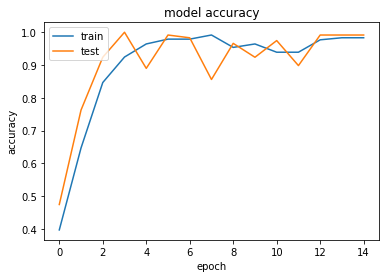

In [49]:
plt.plot(ft_history.history['accuracy'])
plt.plot(ft_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

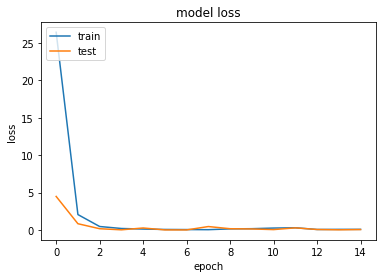

In [50]:
# summarize history for loss
plt.plot(ft_history.history['loss'])
plt.plot(ft_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
# Get the predictions by the model
ft_model_car = tf.keras.models.load_model('/content/gdrive/My Drive/data/transfer_learning_ft_model')
ft_car_predictions = np.round(ft_model_car.predict(train_ds.take(1)),2)
car_classes = train_ds.class_names
# Get the prediction class with the highest probrabilities
print(car_classes)
print(ft_car_predictions)
# Notice we do not use "decode_predictions(car_predictions, top=5)" because decode_predictions is only for ImageNet

['car_front_bumper_damage', 'car_rear_bumper_damage', 'car_side_damage']
[[0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [1.   0.   0.  ]
 [0.97 0.   0.03]
 [0.   0.   1.  ]
 [0.01 0.99 0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.01 0.99 0.  ]
 [1.   0.   0.  ]
 [0.   0.   1.  ]
 [1.   0.   0.  ]]


In [52]:
actual_pred = pd.DataFrame()
# Get the actuals & predictions
actual = []
pred = []
for i in range(32):
  # actuals
  y =train_classes[labels[i]]
  actual.append(y)

  # predictions
  predicted_class = np.argmax(ft_car_predictions[i]) # Get the location of the maximum value. 
  pred.append(car_classes[predicted_class])

actual_pred['actual'] = actual
actual_pred['pred'] = pred
actual_pred

,actual,pred
0,car_rear_bumper_damage,car_side_damage
1,car_side_damage,car_rear_bumper_damage
2,car_rear_bumper_damage,car_rear_bumper_damage
3,car_side_damage,car_side_damage
4,car_rear_bumper_damage,car_side_damage
5,car_rear_bumper_damage,car_front_bumper_damage
6,car_side_damage,car_front_bumper_damage
7,car_front_bumper_damage,car_front_bumper_damage
8,car_side_damage,car_side_damage
9,car_side_damage,car_side_damage


In [53]:
pd.crosstab(actual_pred['actual'],actual_pred['pred'])

pred,car_front_bumper_damage,car_rear_bumper_damage,car_side_damage
actual,,,
car_front_bumper_damage,3,1,4
car_rear_bumper_damage,5,1,3
car_side_damage,3,4,8
